In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd # Data manipulation
import numpy as np # Numerical operations
import seaborn as sns # Statistical visualization
import matplotlib.pyplot as plt # Plotting
import warnings
warnings.filterwarnings("ignore") # Suppress warnings

In [47]:
# load data
data = pd.read_csv('/content/gdrive/MyDrive/DA/DA Assignment/Phishing_Email_Dataset_Ucl.csv')

# Preview data
data.head(11)

,Email ID,Timestamp,Sender Email,Recipient Email,Subject,Email Body,Label,IP Address,Location,Sender Domain,Recipient Domain,Email Length,Attachments,Link Count,Suspicious Keywords,Sector
0,bd510c2e-e9ea-432c-a171-6a83b79e65d7,32:22.4,otyler@protonmail.com,sarahkemp@protonmail.com,National man although for sell thought star.,Indeed government born happen. Realize last be...,Legitimate,208.190.144.153,Juantown,protonmail.com,protonmail.com,96,2,6,"click, urgent",Healthcare
1,73dfe436-8485-49f0-9635-8538046c6295,36:26.4,nicole77@outlook.com,pkelly@yahoo.com,World matter eat year agent soldier energy.,Over treatment agree contain style. Hospital c...,Phishing,8.210.9.207,New Justin,outlook.com,yahoo.com,222,1,4,"click, secure",Retail
2,2aad94e0-da9b-437c-be61-49667db5d762,06:52.9,daniellesoto@gmail.com,mferrell@protonmail.com,Financial responsibility attack.,Lose offer create develop well apply today mou...,Phishing,59.219.62.29,Knoxville,gmail.com,protonmail.com,132,2,0,confirm,Error
3,b4fca1ca-22af-4f15-bfee-e7d7adf159e3,27:21.0,mathissean@yahoo.com,patrickgarcia@aol.com,Night show either various group young.,Discuss offer method. Memory while make. Amoun...,Phishing,213.99.88.75,East Andreaton,yahoo.com,aol.com,119,2,0,"account, update",Retail
4,4a3461a1-6535-42ce-991d-13adf28b8e52,34:03.8,morrishannah@aol.com,vchavez@icloud.com,Error,Movie kitchen health kind which policy. Civil ...,Phishing,90.196.229.178,South Elizabethbury,aol.com,icloud.com,132,2,7,"urgent, verify",Retail
5,f4373fcd-1693-42c8-9825-7e64eafb821a,39:57.6,julieweaver@yahoo.com,jocelyn17@aol.com,Level maybe top defense seem.,Role action home little. Agreement environment...,Phishing,100.49.171.174,Taylorport,yahoo.com,aol.com,218,2,3,"verify, secure, password",Healthcare
6,a2414298-0df2-4bd6-98f4-b191bdfbf776,56:21.2,jennifer56@yahoo.com,clarkstephanie@yahoo.com,Majority least hour like.,State better natural sell. Mrs million deep of...,Legitimate,6.122.155.88,Johnchester,yahoo.com,yahoo.com,178,2,8,login,Retail
7,15855fa2-281d-4170-b1eb-3328ae7ae1a4,58:41.8,vasqueznatalie@protonmail.com,susan01@outlook.com,Everything response include majority probably ...,Let few oil environmental establish. Might eig...,Phishing,152.252.11.64,NaN,protonmail.com,outlook.com,191,3,8,"verify, secure",Healthcare
8,ca695322-d9f5-48c0-a856-48800c239ba5,39:09.7,NaN,elizabeth55@aol.com,In less Republican guess dinner modern.,Blood near wait term. Sea end race design lawy...,Phishing,147.237.43.25,South Tylerstad,NaN,aol.com,171,1,3,"confirm, urgent, login",Retail
9,e3b55d22-3238-4513-986f-0b0b077c417b,06:08.4,brookemurray@aol.com,ljohnson@outlook.com,Effect woman finally kitchen worry.,Error,Legitimate,26.239.119.17,Carterfort,aol.com,outlook.com,5,2,1,"click, login",Healthcare


In [56]:
df = pd.read_csv('/content/gdrive/MyDrive/DA/DA Assignment/Phishing_Email_Dataset_Ucl.csv')

In [ ]:
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())

# Handle missing values
data_cleaned = data.dropna()

# Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Standardizing data formats
data_cleaned.columns = data_cleaned.columns.str.lower()

# Save the cleaned dataset for analysis
cleaned_file_path = 'cleaned_phishing_dataset.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

print("\nData Cleaning Completed. Cleaned dataset saved.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Email ID             497 non-null    object
 1   Timestamp            511 non-null    object
 2   Sender Email         500 non-null    object
 3   Recipient Email      500 non-null    object
 4   Subject              500 non-null    object
 5   Email Body           498 non-null    object
 6   Label                506 non-null    object
 7   IP Address           511 non-null    object
 8   Location             494 non-null    object
 9   Sender Domain        500 non-null    object
 10  Recipient Domain     500 non-null    object
 11  Email Length         512 non-null    object
 12  Attachments          504 non-null    object
 13  Link Count           507 non-null    object
 14  Suspicious Keywords  520 non-null    object
 15  Sector               499 non-null    object
dtypes: objec

In [ ]:
# Display the first few rows of the dataset
print(data.head())


                               Email ID Timestamp            Sender Email  \
0  bd510c2e-e9ea-432c-a171-6a83b79e65d7   32:22.4   otyler@protonmail.com   
1  73dfe436-8485-49f0-9635-8538046c6295   36:26.4    nicole77@outlook.com   
2  2aad94e0-da9b-437c-be61-49667db5d762   06:52.9  daniellesoto@gmail.com   
3  b4fca1ca-22af-4f15-bfee-e7d7adf159e3   27:21.0    mathissean@yahoo.com   
4  4a3461a1-6535-42ce-991d-13adf28b8e52   34:03.8    morrishannah@aol.com   

            Recipient Email                                       Subject  \
0  sarahkemp@protonmail.com  National man although for sell thought star.   
1          pkelly@yahoo.com   World matter eat year agent soldier energy.   
2   mferrell@protonmail.com              Financial responsibility attack.   
3     patrickgarcia@aol.com        Night show either various group young.   
4        vchavez@icloud.com                                         Error   

                                          Email Body       Label  \
0  Ind

In [ ]:
# Basic statistics of numeric columns
print(data.describe())

       Email ID Timestamp Sender Email Recipient Email Subject Email Body  \
count       497       511          500             500     500        498   
unique      470       487          474             473     478        469   
top       Error     Error        Error           Error   Error      Error   
freq          8         4            6               7       3         10   

           Label IP Address     Location Sender Domain Recipient Domain  \
count        506        511          494           500              500   
unique         3        488          458             7                7   
top     Phishing      Error  Heatherview     yahoo.com        gmail.com   
freq         275          5            5           101               93   

       Email Length Attachments Link Count Suspicious Keywords  Sector  
count           512         504        507                 520     499  
unique          174           5         11                 227       3  
top               5

In [ ]:
# Understanding the data types and checking for missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Email ID             497 non-null    object
 1   Timestamp            511 non-null    object
 2   Sender Email         500 non-null    object
 3   Recipient Email      500 non-null    object
 4   Subject              500 non-null    object
 5   Email Body           498 non-null    object
 6   Label                506 non-null    object
 7   IP Address           511 non-null    object
 8   Location             494 non-null    object
 9   Sender Domain        500 non-null    object
 10  Recipient Domain     500 non-null    object
 11  Email Length         512 non-null    object
 12  Attachments          504 non-null    object
 13  Link Count           507 non-null    object
 14  Suspicious Keywords  520 non-null    object
 15  Sector               499 non-null    object
dtypes: objec

In [ ]:
# Get the dimmensions of the DataFrame (rows, columns)
data.shape

(520, 16)

In [ ]:
# Overview of the DataFrame structure, including  data types and missing values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Email ID             497 non-null    object
 1   Timestamp            511 non-null    object
 2   Sender Email         500 non-null    object
 3   Recipient Email      500 non-null    object
 4   Subject              500 non-null    object
 5   Email Body           498 non-null    object
 6   Label                506 non-null    object
 7   IP Address           511 non-null    object
 8   Location             494 non-null    object
 9   Sender Domain        500 non-null    object
 10  Recipient Domain     500 non-null    object
 11  Email Length         512 non-null    object
 12  Attachments          504 non-null    object
 13  Link Count           507 non-null    object
 14  Suspicious Keywords  520 non-null    object
 15  Sector               499 non-null    object
dtypes: objec

In [ ]:
data.columns

Index(['Email ID', 'Timestamp', 'Sender Email', 'Recipient Email', 'Subject',
       'Email Body', 'Label', 'IP Address', 'Location', 'Sender Domain',
       'Recipient Domain', 'Email Length', 'Attachments', 'Link Count',
       'Suspicious Keywords', 'Sector'],
      dtype='object')

In [ ]:
#check missing values
data.isna().sum()


,0
Email ID,23
Timestamp,9
Sender Email,20
Recipient Email,20
Subject,20
Email Body,22
Label,14
IP Address,9
Location,26
Sender Domain,20


In [ ]:
# Check the data duplication
duplicates = data.duplicated()
print(f"Number of duplicate entries: {duplicates.sum()}")

Number of duplicate entries: 20


In [ ]:
df_dropdupli= data.drop_duplicates()

In [ ]:
# Check the data duplication
duplicates = df_dropdupli.duplicated()
print(f"Number of duplicate entries: {duplicates.sum()}")

Number of duplicate entries: 0


In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Email ID               23
Timestamp               9
Sender Email           20
Recipient Email        20
Subject                20
Email Body             22
Label                  14
IP Address              9
Location               26
Sender Domain          20
Recipient Domain       20
Email Length            8
Attachments            16
Link Count             13
Suspicious Keywords     0
Sector                 21
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
# Drop columns if the percentage of missing values is too high (e.g., over 50%)
df = df.dropna(thresh=len(df) * 0.5, axis=1)


In [ ]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Category    0
Value       0
dtype: int64


In [ ]:
# Check the data types of each column
print("Data types of each column:")
print(data.dtypes)


Data types of each column:
Email ID               object
Timestamp              object
Sender Email           object
Recipient Email        object
Subject                object
Email Body             object
Label                  object
IP Address             object
Location               object
Sender Domain          object
Recipient Domain       object
Email Length           object
Attachments            object
Link Count             object
Suspicious Keywords    object
Sector                 object
dtype: object


In [ ]:
# Get a summary of the dataset (mean, median, min, max, etc.)
print("Summary statistics for the dataset:")
print(data.describe())


Summary statistics for the dataset:
       Email ID Timestamp Sender Email Recipient Email Subject Email Body  \
count       497       511          500             500     500        498   
unique      470       487          474             473     478        469   
top       Error     Error        Error           Error   Error      Error   
freq          8         4            6               7       3         10   

           Label IP Address     Location Sender Domain Recipient Domain  \
count        506        511          494           500              500   
unique         3        488          458             7                7   
top     Phishing      Error  Heatherview     yahoo.com        gmail.com   
freq         275          5            5           101               93   

       Email Length Attachments Link Count Suspicious Keywords  Sector  
count           512         504        507                 520     499  
unique          174           5         11              

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load your phishing dataset (uncomment and modify the file path as needed)
# phishing_data = pd.read_csv('your_phishing_data.csv')

# Check the first few rows of the dataset
print("Original Dataset Preview:")
print(phishing_data.head())

# Remove rows with 'Error' in the 'Label' column
phishing_data = phishing_data[phishing_data['Label'] != 'Error']

# Define the target variable and feature set
y = phishing_data['Label']  # Target column
X = phishing_data.drop(columns=['Label'])  # All other columns are features

# Check the original class distribution
print("Original class distribution:", Counter(y))

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Convert non-numeric columns to numeric using Label Encoding
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])  # Apply label encoding
    label_encoders[column] = le  # Store the encoder if you need to inverse transform later

# Apply SMOTE to the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['Label'] = y_resampled

# Check the new class distribution
print("New class distribution:", Counter(balanced_data['Label']))

# Now you can use 'balanced_data' for your further analysis or modeling


Original Dataset Preview:
                               Email ID Timestamp            Sender Email  \
0  bd510c2e-e9ea-432c-a171-6a83b79e65d7   32:22.4   otyler@protonmail.com   
1  73dfe436-8485-49f0-9635-8538046c6295   36:26.4    nicole77@outlook.com   
2  2aad94e0-da9b-437c-be61-49667db5d762   06:52.9  daniellesoto@gmail.com   
3  b4fca1ca-22af-4f15-bfee-e7d7adf159e3   27:21.0    mathissean@yahoo.com   
4  4a3461a1-6535-42ce-991d-13adf28b8e52   34:03.8    morrishannah@aol.com   

            Recipient Email                                       Subject  \
0  sarahkemp@protonmail.com  National man although for sell thought star.   
1          pkelly@yahoo.com   World matter eat year agent soldier energy.   
2   mferrell@protonmail.com              Financial responsibility attack.   
3     patrickgarcia@aol.com        Night show either various group young.   
4        vchavez@icloud.com                                         Error   

                                          Email 

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DA/DA Assignment/Retail_Cyber_Security_Dataset.csv')

In [ ]:
print(df.head())

  Timestamp                        Transaction ID  \
0   01:47.5  32d3d0c1-fe44-4cb2-8c43-a232cf04648f   
1   56:32.2  1cdd8017-320f-4911-95a0-6ea4bd41bfbb   
2   43:28.8  c86c2a93-b5f7-45f8-ac6e-e48bb0dbbf2c   
3   51:05.9  b6fac515-76d7-492a-a7fc-b253a6872701   
4   45:19.6  267f34b4-5135-4aa2-a3d2-7308ea296c67   

                            Customer ID                            Product ID  \
0  de745b60-1988-4479-a3e1-a512f8cce0a0  ae7fe110-9a74-48b3-8c0d-6c272799853f   
1  6407892a-608f-4d8d-b365-12afce2d5b4a  2f29dc27-4c45-4ed1-814d-7ce66cc6e556   
2  e417e111-b0d3-4bf2-a184-c47e98f5eeec  59f94840-3d23-4373-bd7a-26a22cf748c4   
3  02a2eeae-f09b-4345-817d-4164e8cd8d65  35a221f7-8166-4d53-ad7f-d64260ebd5be   
4  34fd96b4-5a84-47b6-91b8-5375a12e10bb  f4fb3402-4dbe-404e-8c2e-ad8eef6b9543   

  Product Category  Amount Payment Method Transaction Status       IP Address  \
0          Apparel  301.38    Credit Card          Completed      97.239.8.82   
1        Furniture  611.88      

Mean Sales Amount: 517.64193


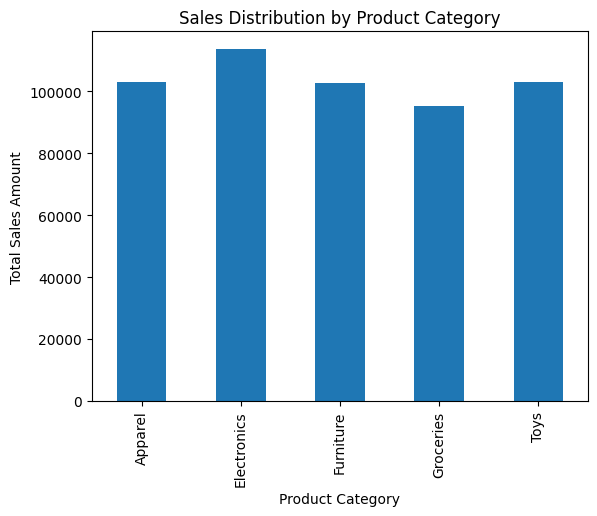

In [ ]:
mean_sales = df['Amount'].mean()
print("Mean Sales Amount:", mean_sales)

# Group data by Product Category and calculate total sales for each category
category_sales = df.groupby('Product Category')['Amount'].sum()

# Plot a bar chart for product category sales
category_sales.plot(kind='bar', title='Sales Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Sample dataset
data = {
    'Timestamp': ['01:47.5', '56:32.2', '43:28.8', '51:05.9', '45:19.6'],
    'Transaction ID': ['32d3d0c1-fe44-4cb2-8c43-a232cf04648f', '1cdd8017-320f-4911-95a0-6ea4bd41bfbb',
                       'c86c2a93-b5f7-45f8-ac6e-e48bb0dbbf2c', 'b6fac515-76d7-492a-a7fc-b253a6872701',
                       '267f34b4-5135-4aa2-a3d2-7308ea296c67'],
    'Product Category': ['Apparel', 'Furniture', 'Toys', 'Groceries', 'Groceries'],
    'Payment Method': ['Credit Card', 'PayPal', 'Debit Card', 'Debit Card', 'Bank Transfer'],
    'Transaction Status': ['Completed', 'Completed', 'Failed', 'Pending', 'Pending'],
    'Location': ['Phoenix', 'Houston', 'Los Angeles', 'Chicago', 'New York'],
    'Device Type': ['Tablet', 'Mobile', 'Desktop', 'Tablet', 'Desktop'],
    'Session Duration': [667, 1973, 363, 723, 2436],
    'Anomaly Indicator': ['Yes', 'Yes', 'Yes', 'No', 'Yes']
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Encode the 'Transaction Status' column to numeric values
le = LabelEncoder()
df['Transaction Status Encoded'] = le.fit_transform(df['Transaction Status'])

# Checking if encoding was successful
print(df[['Transaction Status', 'Transaction Status Encoded']])

# Independent variable (encoded 'Transaction Status') and Dependent variable (Session Duration)
X = df['Transaction Status Encoded'].values.reshape(-1, 1)  # Feature (encoded Transaction Status)
y = df['Session Duration'].values  # Target variable (Session Duration)

# Train a simple linear regression model
model = LinearRegression().fit(X, y)

# Make a prediction (for a 'Transaction Status' encoded as 1, which might represent 'Completed')
prediction = model.predict([[1]])  # '1' could represent 'Completed' (check the encoding mapping)

print("Predicted Session Duration for Transaction Status = 1:", prediction[0])


  Transaction Status  Transaction Status Encoded
0          Completed                           0
1          Completed                           0
2             Failed                           1
3            Pending                           2
4            Pending                           2
Predicted Session Duration for Transaction Status = 1: 1232.4


In [ ]:
from scipy.optimize import linprog

# Example: Minimize cost (objective function: c)
c = [1, 2]  # Costs
A = [[1, 1], [2, 1]]  # Constraints coefficients
b = [4, 5]  # Constraints bounds

result = linprog(c, A_ub=A, b_ub=b, method='highs')
print("Optimal solution:", result.x)


Optimal solution: [0. 0.]


In [ ]:
print(data_cleaned.columns)


Index(['Email ID', 'Timestamp', 'Sender Email', 'Recipient Email', 'Subject',
       'Email Body', 'Label', 'IP Address', 'Location', 'Sender Domain',
       'Recipient Domain', 'Email Length', 'Attachments', 'Link Count',
       'Suspicious Keywords', 'Sector'],
      dtype='object')


In [ ]:
import pandas as pd

# Assuming data_cleaned is your DataFrame

# Function to parse custom time format
def parse_time(time_str):
    """Parses time strings in the format 'HH:MM.S' where HH can be greater than 23.

    Args:
        time_str: The time string to parse.

    Returns:
        A pandas Timestamp object if parsing is successful, otherwise the original string.
    """
    # Convert time_str to string

In [ ]:
import pandas as pd

# Load the phishing dataset
file_path = '/content/gdrive/MyDrive/DA/DA Assignment/Phishing_Email_Dataset_Ucl.csv'  # Update with your actual file path
data = pd.read_csv(file_path)

# Initial inspection
print("Initial Dataset Info:")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())

# Handle missing values
data['Email Body'].fillna('', inplace=True)  # Fill missing email body with empty string
data['IP Address'].fillna('Unknown', inplace=True)  # Replace missing IPs with 'Unknown'

# Remove duplicates
data_cleaned = data.drop_duplicates()

# Clean the Timestamp column
def clean_timestamp(value):
    try:
        return pd.to_datetime(value)
    except Exception:
        return pd.NaT  # Assign as NaT (Not a Time) for invalid timestamps

data_cleaned['Timestamp'] = data_cleaned['Timestamp'].apply(clean_timestamp)

# Check for and handle invalid Timestamps
invalid_timestamps = data_cleaned['Timestamp'].isna().sum()
print(f"Number of invalid Timestamps: {invalid_timestamps}")

# Drop rows with invalid Timestamps
data_cleaned = data_cleaned.dropna(subset=['Timestamp'])

# Save the cleaned dataset
cleaned_file_path = 'cleaned_phishing_dataset.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

print("\nData Cleaning Completed. Cleaned dataset saved.")


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Email ID             497 non-null    object
 1   Timestamp            511 non-null    object
 2   Sender Email         500 non-null    object
 3   Recipient Email      500 non-null    object
 4   Subject              500 non-null    object
 5   Email Body           498 non-null    object
 6   Label                506 non-null    object
 7   IP Address           511 non-null    object
 8   Location             494 non-null    object
 9   Sender Domain        500 non-null    object
 10  Recipient Domain     500 non-null    object
 11  Email Length         512 non-null    object
 12  Attachments          504 non-null    object
 13  Link Count           507 non-null    object
 14  Suspicious Keywords  520 non-null    object
 15  Sector               499 non-null  

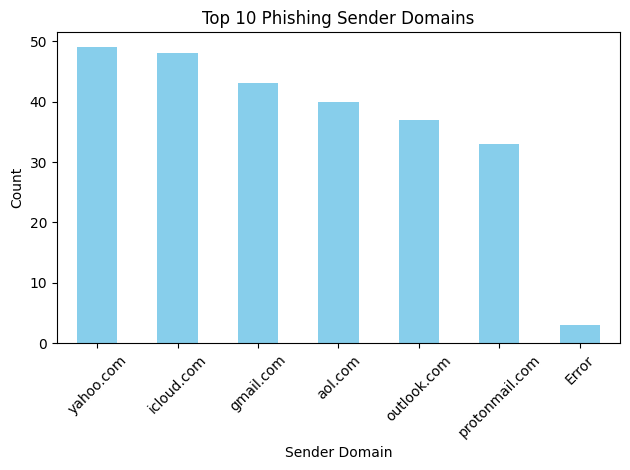

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'Label' is cleaned
data_cleaned['Label'] = data_cleaned['Label'].str.strip().str.lower()

# Group by sender domain and count phishing emails
sender_analysis = data_cleaned[data_cleaned['Label'] == 'phishing'].groupby('Sender Domain').size().sort_values(ascending=False).head(10)

# Check if sender_analysis is empty
if sender_analysis.empty:
    print("No phishing emails found in the dataset for sender domain analysis.")
else:
    # Plot top 10 phishing sender domains
    sender_analysis.plot(kind='bar', title='Top 10 Phishing Sender Domains', ylabel='Count', color='skyblue')
    plt.xlabel("Sender Domain")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Number of invalid email lengths: 9


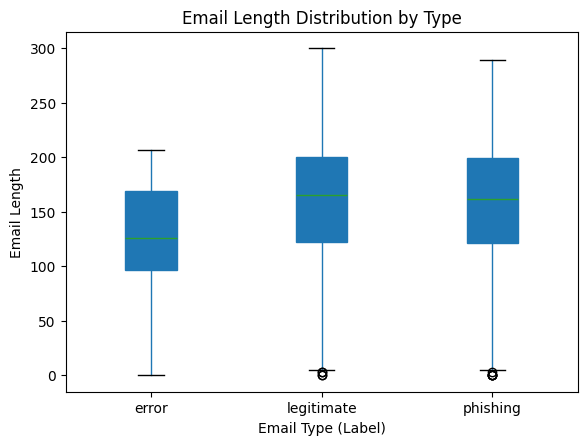

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'Email Length' is numeric
data_cleaned['Email Length'] = pd.to_numeric(data_cleaned['Email Length'], errors='coerce')

# Check for and remove rows with NaN in 'Email Length'
invalid_lengths = data_cleaned['Email Length'].isna().sum()
print(f"Number of invalid email lengths: {invalid_lengths}")

data_cleaned = data_cleaned.dropna(subset=['Email Length'])

# Boxplot for 'Email Length' by 'Label'
try:
    data_cleaned.boxplot(column='Email Length', by='Label', grid=False, patch_artist=True)
    plt.title('Email Length Distribution by Type')
    plt.suptitle("")  # Removes default title added by boxplot
    plt.xlabel('Email Type (Label)')
    plt.ylabel('Email Length')
    plt.show()
except Exception as e:
    print(f"Error while plotting: {e}")


In [ ]:
# Count occurrences of IPs for phishing emails
ip_analysis = data_cleaned[data_cleaned['Label'] == 'phishing']['IP Address'].value_counts().head(10)

# Display top IPs associated with phishing emails
print("\nTop IP Addresses Associated with Phishing:\n", ip_analysis)



Top IP Addresses Associated with Phishing:
 IP Address
Unknown           3
Error             2
38.148.18.151     1
44.104.211.33     1
166.96.233.6      1
9.239.1.198       1
59.168.104.136    1
93.254.196.130    1
44.204.58.195     1
83.24.153.186     1
Name: count, dtype: int64


In [ ]:
# Save flagged emails locally
suspicious_emails.write.csv("suspicious_emails.csv", header=True, mode="overwrite")
print("\nBig Data Analysis Completed and Results Saved.")



Big Data Analysis Completed and Results Saved.


In [ ]:
data_cleaned.dtypes


,0
Email ID,object
Timestamp,object
Sender Email,object
Recipient Email,object
Subject,object
Email Body,object
Label,object
IP Address,object
Location,object
Sender Domain,object


In [ ]:
import pandas as pd

# Assuming 'data_cleaned' is your DataFrame

# Convert 'Timestamp' to datetime
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'], errors='coerce')

# Convert 'Link Count' and 'Email Length' to numeric (float)
data_cleaned['Link Count'] = pd.to_numeric(data_cleaned['Link Count'], errors='coerce')
data_cleaned['Email Length'] = pd.to_numeric(data_cleaned['Email Length'], errors='coerce')

# Ensure 'Suspicious Keywords' is treated as string
data_cleaned['Suspicious Keywords'] = data_cleaned['Suspicious Keywords'].astype(str)

# Check the updated data types
print(data_cleaned.dtypes)


Email ID                       object
Timestamp              datetime64[ns]
Sender Email                   object
Recipient Email                object
Subject                        object
Email Body                     object
Label                          object
IP Address                     object
Location                       object
Sender Domain                  object
Recipient Domain               object
Email Length                  float64
Attachments                    object
Link Count                    float64
Suspicious Keywords            object
Sector                         object
dtype: object


In [ ]:
data_cleaned['Link Count'] = data_cleaned['Link Count'].fillna(0)
data_cleaned['Email Length'] = data_cleaned['Email Length'].fillna(0)
data_cleaned['Suspicious Keywords'] = data_cleaned['Suspicious Keywords'].fillna('None')


In [ ]:
data_cleaned = data_cleaned.dropna(subset=['Link Count', 'Email Length', 'Suspicious Keywords'])


In [ ]:
# Check the data types again
print(data_cleaned.dtypes)

# Check for any missing values
print(data_cleaned.isnull().sum())


Email ID                       object
Timestamp              datetime64[ns]
Sender Email                   object
Recipient Email                object
Subject                        object
Email Body                     object
Label                          object
IP Address                     object
Location                       object
Sender Domain                  object
Recipient Domain               object
Email Length                  float64
Attachments                    object
Link Count                    float64
Suspicious Keywords            object
Sector                         object
dtype: object
Email ID                23
Timestamp              313
Sender Email            19
Recipient Email         20
Subject                 20
Email Body               0
Label                   14
IP Address               0
Location                25
Sender Domain           19
Recipient Domain        20
Email Length             0
Attachments             16
Link Count               0


In [ ]:
# Convert 'Timestamp' to datetime
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'], errors='coerce')

# Convert 'Link Count' and 'Email Length' to numeric (int or float)
data_cleaned['Link Count'] = pd.to_numeric(data_cleaned['Link Count'], errors='coerce')
data_cleaned['Email Length'] = pd.to_numeric(data_cleaned['Email Length'], errors='coerce')

# Ensure 'Suspicious Keywords' is a string (if it contains keywords)
data_cleaned['Suspicious Keywords'] = data_cleaned['Suspicious Keywords'].astype(str)

# Check the data types
print(data_cleaned.dtypes)


Email ID                       object
Timestamp              datetime64[ns]
Sender Email                   object
Recipient Email                object
Subject                        object
Email Body                     object
Label                          object
IP Address                     object
Location                       object
Sender Domain                  object
Recipient Domain               object
Email Length                  float64
Attachments                    object
Link Count                    float64
Suspicious Keywords            object
Sector                         object
dtype: object


In [ ]:
# Fill missing values or drop rows with missing values
data_cleaned = data_cleaned.fillna({'Link Count': 0, 'Email Length': 0})  # Fill with 0
# or
data_cleaned = data_cleaned.dropna()  # Drop rows with missing values


In [ ]:
import pandas as pd

# Load your dataset
data_cleaned = pd.read_csv('/content/gdrive/MyDrive/DA/DA Assignment/Phishing_Email_Dataset_Ucl.csv')  # Replace with the correct path


In [ ]:
print(data_cleaned[data_cleaned['Sender Domain'] == 'Error'])


                                 Email ID Timestamp Sender Email  \
37   78159d46-e91b-443a-9aeb-f03692e27862   07:58.1          NaN   
81   115e06f3-b88e-4a2d-af7d-c931566117cd   34:43.1          NaN   
311  2921568c-dbef-4800-a801-dc38a0b0ad7d   57:40.1        Error   
327  935b4407-792d-4190-bfb3-18ac04d1536d   27:24.6        Error   
340  2abc3619-fb1f-44ae-a5d7-83671fdf0ca8   31:22.3        Error   
459  75ca3436-b95b-4d62-9cec-e6922f1b135b   53:43.7          NaN   

             Recipient Email                                  Subject  \
37      richard52@icloud.com                                    Error   
81   nicole43@protonmail.com          Wrong age medical glass decide.   
311           gburke@aol.com                Bank remember pretty hit.   
327           vjones@aol.com          Whatever writer million window.   
340        fnguyen@gmail.com                Crime room thought child.   
459  hudsontimothy@yahoo.com  Technology either enough four pass yes.   

           

In [ ]:
data_cleaned = data_cleaned[data_cleaned['Sender Domain'] != 'Error']


In [ ]:
data_cleaned['Sender Domain'] = data_cleaned['Sender Domain'].replace('Error', 'Unknown')


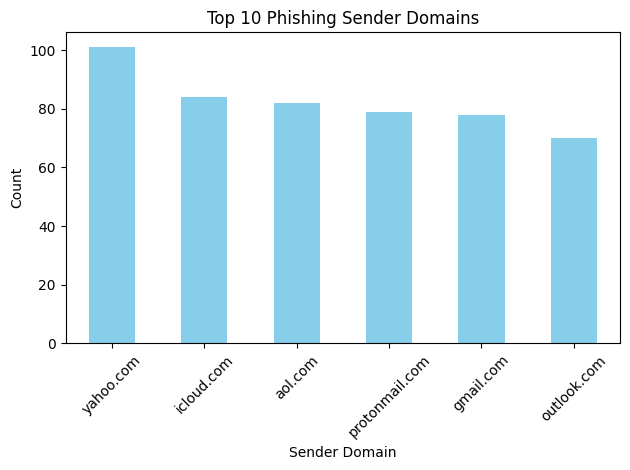

In [ ]:
sender_analysis = data_cleaned['Sender Domain'].value_counts().head(10)
sender_analysis.plot(kind='bar', title='Top 10 Phishing Sender Domains', ylabel='Count', color='skyblue')
plt.xlabel('Sender Domain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
data_cleaned = data_cleaned[data_cleaned['Label'] != 'Error']


In [ ]:
print(data_cleaned[data_cleaned['Email Length'] <= 0])


                                 Email ID Timestamp  \
173  f3460231-ac5e-4166-b6af-ffbb2d7f5f68   14:51.0   
181  da6b68a1-0887-4b1c-8c09-f5e7e382531f   35:24.7   
207  2b435773-bfc7-470f-b88a-b234cde79036   42:45.5   
357  de6c343d-8827-404b-a258-78d7e037a6f5   32:22.9   
374  7734442b-69cc-493e-9d01-1416b6150736   10:32.1   
418  b42f659d-ca8b-476a-b088-18dbeb3da64b   52:54.7   
447  2a0bb082-241c-41f4-b9f3-216faf32547b   46:52.0   

                   Sender Email           Recipient Email  \
173   shawnhines@protonmail.com        brandi88@yahoo.com   
181           bhughes@gmail.com  bassjames@protonmail.com   
207  mandyfitzpatrick@yahoo.com  smithmichelle@icloud.com   
357   lewisjamie@protonmail.com        jcarter@icloud.com   
374        uryan@protonmail.com         pthomas@yahoo.com   
418        sarahperry@yahoo.com   katherinerios@yahoo.com   
447      darrylkhan@outlook.com    baileykaren@icloud.com   

                                               Subject Email Body     

In [ ]:
data_cleaned = data_cleaned[data_cleaned['Email Length'] > 0]


In [ ]:
data_cleaned['Email Length'] = data_cleaned['Email Length'].apply(lambda x: x if x > 0 else data_cleaned['Email Length'].median())


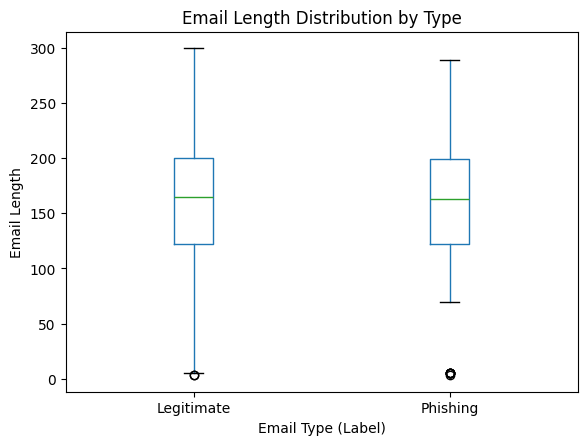

In [ ]:
import matplotlib.pyplot as plt

# Generate the boxplot
data_cleaned.boxplot(column='Email Length', by='Label', grid=False, showfliers=True)
plt.title('Email Length Distribution by Type')
plt.suptitle('')  # Removes the default title
plt.xlabel('Email Type (Label)')
plt.ylabel('Email Length')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/gdrive/MyDrive/DA/DA Assignment/Phishing_Email_Dataset_Ucl.csv')

# Preprocessing: Convert categorical data to numeric
encoder = LabelEncoder()

# Convert non-numeric columns to numeric
for column in data.columns:
    if data[column].dtype == 'object':  # Check for non-numeric columns
        data[column] = encoder.fit_transform(data[column])

# Features and Target
X = data.drop(columns=['Label'])  # Features
y = data['Label']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 0  0  1  0]
 [ 0 15 30  0]
 [ 0 16 40  0]
 [ 0  1  1  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.47      0.33      0.39        45
           2       0.56      0.71      0.62        56
           3       0.00      0.00      0.00         2

    accuracy                           0.53       104
   macro avg       0.26      0.26      0.25       104
weighted avg       0.50      0.53      0.51       104



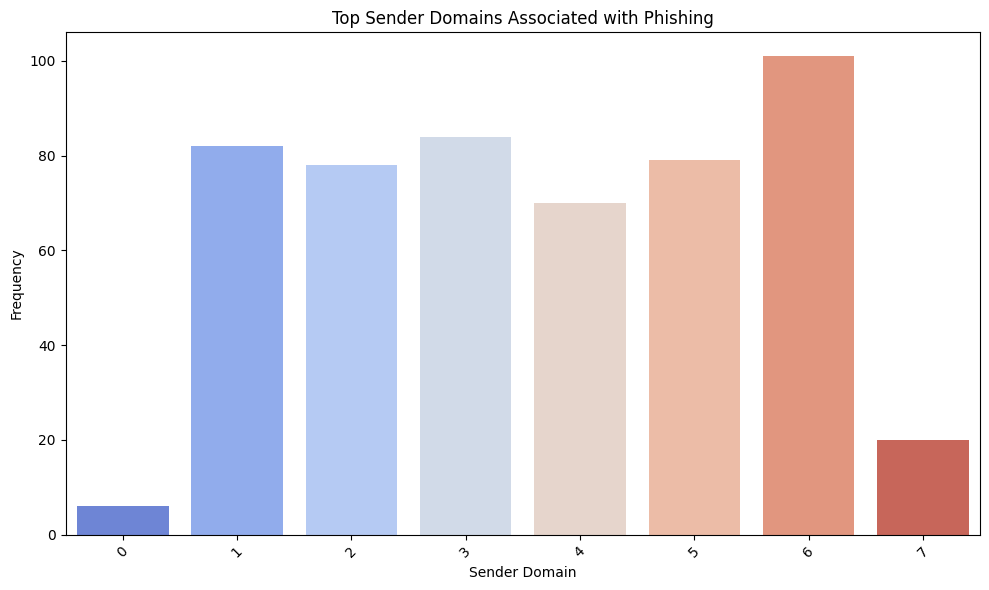

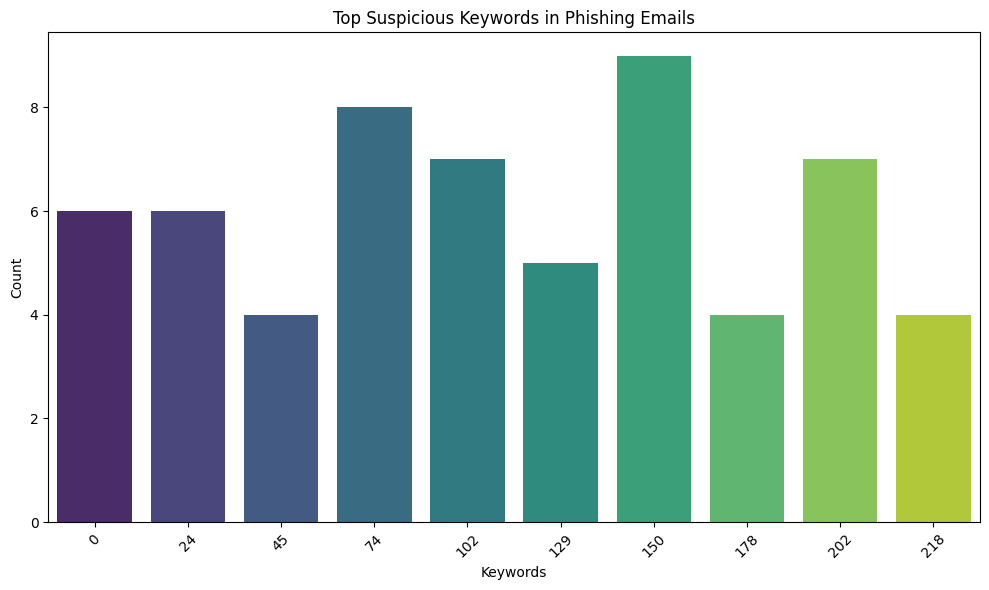

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze trend: Top sender domains
sender_trends = data['Sender Domain'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=sender_trends.index, y=sender_trends.values, palette='coolwarm')
plt.title("Top Sender Domains Associated with Phishing")
plt.xlabel("Sender Domain")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trend analysis: Keyword correlation with phishing
suspicious_keywords = data[data['Label'] == 1]['Suspicious Keywords'].value_counts().head(10)

# Plotting suspicious keywords
plt.figure(figsize=(10, 6))
sns.barplot(x=suspicious_keywords.index, y=suspicious_keywords.values, palette='viridis')
plt.title("Top Suspicious Keywords in Phishing Emails")
plt.xlabel("Keywords")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


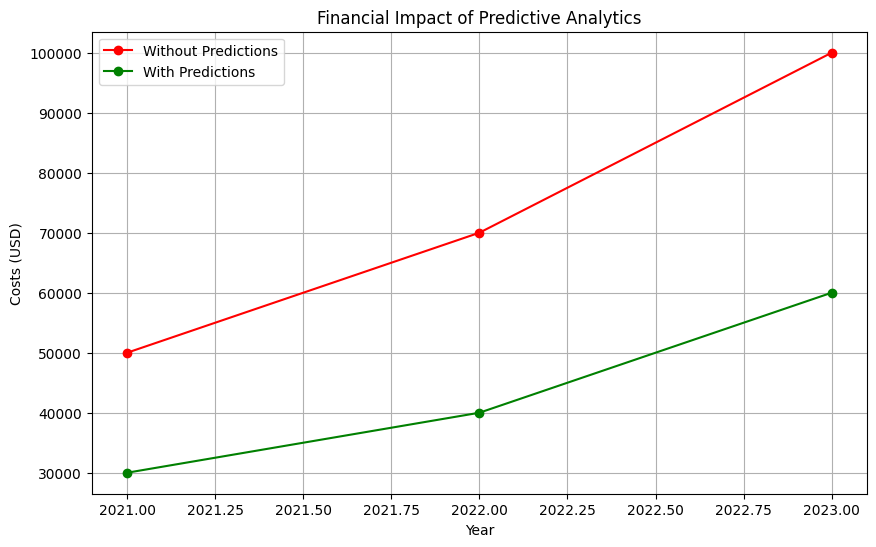

Strategic Recommendation:
1. Expand predictive analytics to cover all sectors.
2. Invest in training employees to understand predictive insights.
3. Regularly update predictive models using fresh threat intelligence data.


In [ ]:
# Simulating Financial Impact Analysis
financial_data = pd.DataFrame({
    'Year': [2021, 2022, 2023],
    'Costs Without Predictions': [50000, 70000, 100000],
    'Costs With Predictions': [30000, 40000, 60000]
})

# Plot Financial Impact
plt.figure(figsize=(10, 6))
plt.plot(financial_data['Year'], financial_data['Costs Without Predictions'], marker='o', label='Without Predictions', color='red')
plt.plot(financial_data['Year'], financial_data['Costs With Predictions'], marker='o', label='With Predictions', color='green')
plt.title("Financial Impact of Predictive Analytics")
plt.xlabel("Year")
plt.ylabel("Costs (USD)")
plt.legend()
plt.grid(True)
plt.show()

# Strategic Recommendation Summary
print("Strategic Recommendation:")
print("1. Expand predictive analytics to cover all sectors.")
print("2. Invest in training employees to understand predictive insights.")
print("3. Regularly update predictive models using fresh threat intelligence data.")


In [ ]:
# Apply one-hot encoding on 'Sender Domain' or another categorical column
if 'Sender Domain' in data.columns:
    data = pd.get_dummies(data, columns=['Sender Domain'], drop_first=True)
else:
    print("The column 'Sender Domain' is not found in the dataset.")


The column 'Sender Domain' is not found in the dataset.


In [ ]:
# Define Features and Target
features = ['Email Length', 'Link Count', 'Attachments', 'Suspicious Keywords']
if all(feature in data.columns for feature in features):
    X = data[features]
    y = data['Label']  # 0 = Legitimate, 1 = Phishing
else:
    missing = [feature for feature in features if feature not in data.columns]
    print(f"Missing columns in dataset: {missing}")


In [ ]:
print(X.dtypes)


Email Length           object
Link Count             object
Attachments            object
Suspicious Keywords    object
dtype: object


In [ ]:
# Check for 'Error' values in the dataset
print(data.isin(['Error']).any())

# Replace 'Error' with NaN for easier handling
data.replace('Error', pd.NA, inplace=True)

# Drop rows with NaN or handle them differently (e.g., replace with mean/median)
data.dropna(inplace=True)  # Alternatively, use data.fillna(value)


Email ID                         True
Timestamp                        True
Sender Email                     True
Recipient Email                  True
Subject                          True
Email Body                       True
Label                            True
IP Address                       True
Location                         True
Recipient Domain                 True
Email Length                     True
Attachments                      True
Link Count                       True
Suspicious Keywords             False
Sector                           True
Sender Domain_aol.com           False
Sender Domain_gmail.com         False
Sender Domain_icloud.com        False
Sender Domain_outlook.com       False
Sender Domain_protonmail.com    False
Sender Domain_yahoo.com         False
dtype: bool


In [ ]:
print(X.dtypes)


Email Length           object
Link Count             object
Attachments            object
Suspicious Keywords    object
dtype: object


In [ ]:
# Features (ensure they are all numeric)
features = ['Email Length', 'Link Count', 'Attachments']

# Add encoded Sender Domain columns
for col in data.columns:
    if col.startswith('Sender Domain_'):
        features.append(col)

# Define X and y
X = data[features]
y = data['Label']  # Ensure 'Label' is numeric


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[15 32]
 [10 30]]
Classification Report:
               precision    recall  f1-score   support

  Legitimate       0.60      0.32      0.42        47
    Phishing       0.48      0.75      0.59        40

    accuracy                           0.52        87
   macro avg       0.54      0.53      0.50        87
weighted avg       0.55      0.52      0.50        87

Accuracy Score: 0.5172413793103449


In [ ]:
# Clean 'Attachments' column
def clean_attachments(value):
    try:
        return int(value)  # Try to convert to integer
    except (ValueError, TypeError):
        return 0  # Replace invalid values with 0

data['Attachments'] = data['Attachments'].fillna(0).apply(clean_attachments)


In [ ]:
# Check if 'Sender Domain' and 'Sector' are still in the dataset
if 'Sender Domain' in data.columns and 'Sector' in data.columns:
    # One-hot encode categorical columns
    data = pd.get_dummies(data, columns=['Sender Domain', 'Sector'], drop_first=True)
else:
    print("Columns 'Sender Domain' and 'Sector' are already encoded or missing.")


Columns 'Sender Domain' and 'Sector' are already encoded or missing.


In [ ]:
# Clean 'Email Length' column
def clean_numeric(value):
    try:
        return float(value)  # Convert valid numbers
    except (ValueError, TypeError):
        return 0  # Replace invalid entries with 0

data['Email Length'] = data['Email Length'].apply(clean_numeric)
data['Link Count'] = data['Link Count'].apply(clean_numeric)


In [ ]:
print(data[features].dtypes)


Email Length                    float64
Link Count                      float64
Attachments                       int64
Has Suspicious Keywords           int64
Sender Domain_aol.com              bool
Sender Domain_gmail.com            bool
Sender Domain_icloud.com           bool
Sender Domain_outlook.com          bool
Sender Domain_protonmail.com       bool
Sender Domain_yahoo.com            bool
Sector_Healthcare                  bool
Sector_Retail                      bool
dtype: object


In [ ]:
print(y_train.isna().sum())


364


In [ ]:
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()


In [ ]:
y_train = y_train.fillna(0)


In [ ]:
print(y_train.isna().sum())  # Should return 0


0


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (0, 12)
y_train shape: (0,)


In [ ]:
from sklearn.model_selection import train_test_split

# Example: Ensure proper splitting
X = data.drop(columns=['Label'])  # Replace 'Label' with your target column
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes after splitting
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (416, 22)
y_train shape: (416,)


In [ ]:
# Verify column names first
columns_to_encode = ['Sender Domain', 'Sector']  # Adjust to match your dataset
for col in columns_to_encode:
    if col not in data.columns:
        print(f"Column '{col}' is missing from the dataset!")


Column 'Sender Domain' is missing from the dataset!
Column 'Sector' is missing from the dataset!


In [ ]:
data = pd.get_dummies(data, drop_first=True)


In [ ]:
data = data.drop(columns=['Sender Domain_aol.com', 'Sector_Healthcare'])


In [ ]:
print(data.isnull().sum())


Label                                           520
Email Length                                      0
Attachments                                       0
Link Count                                        0
Sender Domain_gmail.com                           0
                                               ... 
Suspicious Keywords_verify, update, password      0
Suspicious Keywords_verify, update, secure        0
Suspicious Keywords_verify, urgent                0
Suspicious Keywords_verify, urgent, click         0
Suspicious Keywords_verify, urgent, secure        0
Length: 4032, dtype: int64


In [ ]:
X = data.drop(columns=['Label'])  # Drop the target column
y = data['Label']  # The target variable


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd # Import pandas if not already imported

# Before splitting into train and test sets
data = data.dropna(subset=['Label'])  # Drop rows with NaN values in 'Label' column

# Now proceed with your train-test split and model training as before
X = data.drop(columns=['Label'])
y = data['Label']


In [ ]:
print(X.shape)  # Should not be (0, n)
print(y.shape)  # Should not be (0,)


(0, 4031)
(0,)


In [ ]:
X = data.drop(columns=['Label'])  # Ensure 'Label' is a valid column name
y = data['Label']  # Ensure 'Label' is a valid column


In [ ]:
print(data.columns)


Index(['Label', 'Email Length', 'Attachments', 'Link Count',
       'Sender Domain_gmail.com', 'Sender Domain_icloud.com',
       'Sender Domain_outlook.com', 'Sender Domain_protonmail.com',
       'Sender Domain_yahoo.com', 'Sector_Retail',
       ...
       'Suspicious Keywords_verify, password',
       'Suspicious Keywords_verify, secure',
       'Suspicious Keywords_verify, secure, password',
       'Suspicious Keywords_verify, update',
       'Suspicious Keywords_verify, update, account',
       'Suspicious Keywords_verify, update, password',
       'Suspicious Keywords_verify, update, secure',
       'Suspicious Keywords_verify, urgent',
       'Suspicious Keywords_verify, urgent, click',
       'Suspicious Keywords_verify, urgent, secure'],
      dtype='object', length=4032)


In [ ]:
print(data.head())


Empty DataFrame
Columns: [Label, Email Length, Attachments, Link Count, Sender Domain_gmail.com, Sender Domain_icloud.com, Sender Domain_outlook.com, Sender Domain_protonmail.com, Sender Domain_yahoo.com, Sector_Retail, Has Suspicious Keywords, Email ID_00306540-3cae-4dd7-a06b-1eeba4f232f9, Email ID_00a45eca-e5a7-43d6-a4e5-ec09b4547a34, Email ID_0245eaa3-07ca-4ef7-aa67-afdd82a0e6f9, Email ID_02a76c66-a7bf-408e-9f0d-424cdde0abc9, Email ID_03ca2194-352e-4632-a2f6-08ed6684184a, Email ID_03d6b3ab-7277-4147-bf46-f9e93c999110, Email ID_04d57530-205c-4a49-af4e-3409326f9811, Email ID_05f0b6e7-b4eb-4a2e-abb1-a8bfd1644f00, Email ID_08841388-ddde-4f1b-9124-742d74692389, Email ID_0895d969-0417-455f-931d-7e2d3b0a786c, Email ID_08efc1b8-ca8b-4c26-93f3-b7cc30bd4a3c, Email ID_095d9615-5e38-418b-be97-59116dff3411, Email ID_098a7dd6-f866-4320-a92e-3840ac46feea, Email ID_09ef08c4-41d5-42f9-bc51-dfbe1a34a396, Email ID_0a41d861-5c5a-42dc-8feb-acb651e1a10e, Email ID_0b16505e-cd2f-4a36-ab10-df01eaacb0d5, Ema

In [ ]:
print(data.isnull().sum())


Label                                           0
Email Length                                    0
Attachments                                     0
Link Count                                      0
Sender Domain_gmail.com                         0
                                               ..
Suspicious Keywords_verify, update, password    0
Suspicious Keywords_verify, update, secure      0
Suspicious Keywords_verify, urgent              0
Suspicious Keywords_verify, urgent, click       0
Suspicious Keywords_verify, urgent, secure      0
Length: 4032, dtype: int64


In [ ]:
data = data.dropna()  # Drop rows with missing values


In [5]:
print(X_train.dtypes)


Email ID               object
Timestamp              object
Sender Email           object
Recipient Email        object
Subject                object
Email Body             object
IP Address             object
Location               object
Sender Domain          object
Recipient Domain       object
Email Length           object
Attachments            object
Link Count             object
Suspicious Keywords    object
Sector                 object
dtype: object


In [6]:
# One-hot encoding categorical columns
categorical_cols = ['Sender Domain', 'Recipient Domain', 'Sector']
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure both train and test datasets have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [7]:
# Convert string-based numeric columns to float
numeric_cols = ['Email Length', 'Attachments', 'Link Count']

for col in numeric_cols:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')  # Coerce errors to NaN
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Handle missing values after conversion (if any)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


In [8]:
# Drop irrelevant columns
irrelevant_cols = ['Email ID', 'Timestamp', 'Sender Email', 'Recipient Email', 'Subject', 'Email Body', 'IP Address', 'Location']
X_train.drop(columns=irrelevant_cols, inplace=True, errors='ignore')
X_test.drop(columns=irrelevant_cols, inplace=True, errors='ignore')


In [10]:
# Create a new column with the count of keywords
X_train['Keyword Count'] = X_train['Suspicious Keywords'].apply(lambda x: len(str(x).split(',')))
X_test['Keyword Count'] = X_test['Suspicious Keywords'].apply(lambda x: len(str(x).split(',')))

# Drop the original column
X_train.drop(columns=['Suspicious Keywords'], inplace=True, errors='ignore')
X_test.drop(columns=['Suspicious Keywords'], inplace=True, errors='ignore')


In [11]:
print(X_train.dtypes)
print(X_test.dtypes)


Email Length                       float64
Attachments                        float64
Link Count                         float64
Sender Domain_aol.com                 bool
Sender Domain_gmail.com               bool
Sender Domain_icloud.com              bool
Sender Domain_outlook.com             bool
Sender Domain_protonmail.com          bool
Sender Domain_yahoo.com               bool
Recipient Domain_aol.com              bool
Recipient Domain_gmail.com            bool
Recipient Domain_icloud.com           bool
Recipient Domain_outlook.com          bool
Recipient Domain_protonmail.com       bool
Recipient Domain_yahoo.com            bool
Sector_Healthcare                     bool
Sector_Retail                         bool
Keyword Count                        int64
dtype: object
Email Length                       float64
Attachments                        float64
Link Count                         float64
Sender Domain_aol.com                 bool
Sender Domain_gmail.com               bo

In [12]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())


Email Length                       0
Attachments                        0
Link Count                         0
Sender Domain_aol.com              0
Sender Domain_gmail.com            0
Sender Domain_icloud.com           0
Sender Domain_outlook.com          0
Sender Domain_protonmail.com       0
Sender Domain_yahoo.com            0
Recipient Domain_aol.com           0
Recipient Domain_gmail.com         0
Recipient Domain_icloud.com        0
Recipient Domain_outlook.com       0
Recipient Domain_protonmail.com    0
Recipient Domain_yahoo.com         0
Sector_Healthcare                  0
Sector_Retail                      0
Keyword Count                      0
dtype: int64
Email Length                       0
Attachments                        0
Link Count                         0
Sender Domain_aol.com              0
Sender Domain_gmail.com            0
Sender Domain_icloud.com           0
Sender Domain_outlook.com          0
Sender Domain_protonmail.com       0
Sender Domain_yahoo.com  

In [14]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())


Email Length                       0
Attachments                        0
Link Count                         0
Sender Domain_aol.com              0
Sender Domain_gmail.com            0
Sender Domain_icloud.com           0
Sender Domain_outlook.com          0
Sender Domain_protonmail.com       0
Sender Domain_yahoo.com            0
Recipient Domain_aol.com           0
Recipient Domain_gmail.com         0
Recipient Domain_icloud.com        0
Recipient Domain_outlook.com       0
Recipient Domain_protonmail.com    0
Recipient Domain_yahoo.com         0
Sector_Healthcare                  0
Sector_Retail                      0
Keyword Count                      0
dtype: int64
Email Length                       0
Attachments                        0
Link Count                         0
Sender Domain_aol.com              0
Sender Domain_gmail.com            0
Sender Domain_icloud.com           0
Sender Domain_outlook.com          0
Sender Domain_protonmail.com       0
Sender Domain_yahoo.com  

In [15]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
X_train.fillna(X_train.mode().iloc[0], inplace=True)
X_test.fillna(X_test.mode().iloc[0], inplace=True)


In [16]:
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
X_train.dropna(axis=1, inplace=True)
X_test.dropna(axis=1, inplace=True)


In [17]:
print(X_train.isnull().sum().sum())  # Should return 0
print(X_test.isnull().sum().sum())  # Should return 0


0
0


In [19]:
print(X_train.isnull().sum())  # Check missing values column-wise in X_train
print(X_test.isnull().sum())  # Check missing values column-wise in X_test
print(y_train.isnull().sum())  # Check missing values in y_train
print(y_test.isnull().sum())  # Check missing values in y_test


Email Length                       0
Attachments                        0
Link Count                         0
Sender Domain_aol.com              0
Sender Domain_gmail.com            0
Sender Domain_icloud.com           0
Sender Domain_outlook.com          0
Sender Domain_protonmail.com       0
Sender Domain_yahoo.com            0
Recipient Domain_aol.com           0
Recipient Domain_gmail.com         0
Recipient Domain_icloud.com        0
Recipient Domain_outlook.com       0
Recipient Domain_protonmail.com    0
Recipient Domain_yahoo.com         0
Sector_Healthcare                  0
Sector_Retail                      0
Keyword Count                      0
dtype: int64
Email Length                       0
Attachments                        0
Link Count                         0
Sender Domain_aol.com              0
Sender Domain_gmail.com            0
Sender Domain_icloud.com           0
Sender Domain_outlook.com          0
Sender Domain_protonmail.com       0
Sender Domain_yahoo.com  

In [20]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [21]:
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train = y_train[X_train.index]  # Ensure alignment after dropping rows
y_test = y_test[X_test.index]


In [22]:
print(X_train.isnull().sum().sum())  # Should output 0
print(X_test.isnull().sum().sum())  # Should output 0
print(y_train.isnull().sum())  # Should output 0
print(y_test.isnull().sum())  # Should output 0


0
0
12
2


In [23]:
print(y_train[y_train.isnull()])
print(y_test[y_test.isnull()])


15     NaN
473    NaN
113    NaN
211    NaN
472    NaN
237    NaN
455    NaN
89     NaN
467    NaN
27     NaN
161    NaN
474    NaN
Name: Label, dtype: object
218    NaN
153    NaN
Name: Label, dtype: object


In [24]:
# Drop NaN from y_train and align X_train
y_train_clean = y_train.dropna()
X_train_clean = X_train.loc[y_train_clean.index]

# Drop NaN from y_test and align X_test
y_test_clean = y_test.dropna()
X_test_clean = X_test.loc[y_test_clean.index]


In [25]:
# Drop NaN from y_train and align X_train
y_train_clean = y_train.dropna()
X_train_clean = X_train.loc[y_train_clean.index]

# Drop NaN from y_test and align X_test
y_test_clean = y_test.dropna()
X_test_clean = X_test.loc[y_test_clean.index]


In [26]:
print(y_train_clean.isnull().sum())  # Should print 0
print(y_test_clean.isnull().sum())  # Should print 0


0
0


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_clean, y_train_clean)

# Make predictions
y_pred = model.predict(X_test_clean)

# Evaluate the model
print(classification_report(y_test_clean, y_pred))


              precision    recall  f1-score   support

       Error       0.00      0.00      0.00         1
  Legitimate       0.53      0.40      0.46        45
    Phishing       0.59      0.71      0.65        56

    accuracy                           0.57       102
   macro avg       0.37      0.37      0.37       102
weighted avg       0.56      0.57      0.56       102



In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_clean, y_train_clean)

# Predict on the test set
y_pred = model.predict(X_test_clean)


In [29]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test_clean, y_pred))
print("\nClassification Report:\n", classification_report(y_test_clean, y_pred))


Accuracy: 0.5686274509803921

Classification Report:
               precision    recall  f1-score   support

       Error       0.00      0.00      0.00         1
  Legitimate       0.53      0.40      0.46        45
    Phishing       0.59      0.71      0.65        56

    accuracy                           0.57       102
   macro avg       0.37      0.37      0.37       102
weighted avg       0.56      0.57      0.56       102



In [30]:
import joblib

# Save the model to a file
joblib.dump(model, 'random_forest_model.pkl')

# Load the model later
loaded_model = joblib.load('random_forest_model.pkl')


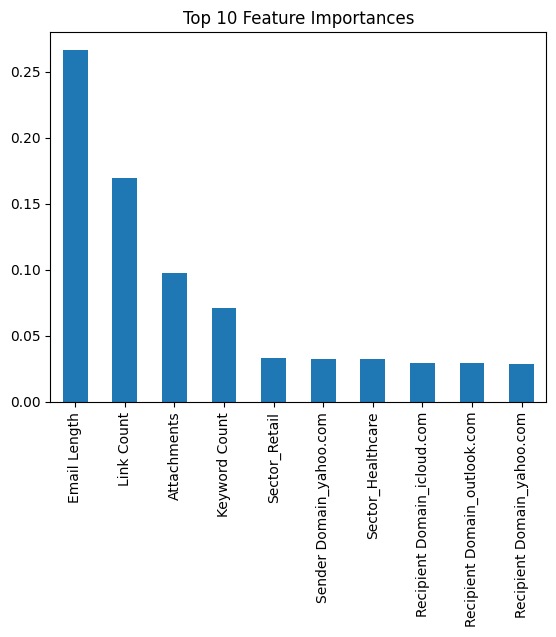

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X_train_clean.columns)

# Plot feature importance
feature_importance.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.show()


In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Drop rows with NaNs in either X_train or y_train
# Drop rows with NaNs in X_train and align y_train accordingly
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]  # Align y_train with X_train_clean

# Drop rows with NaN in y_train_clean (if any)
y_train_clean = y_train_clean.dropna()

# Ensure X_train_clean and y_train_clean have the same number of rows
X_train_clean, y_train_clean = X_train_clean.align(y_train_clean, join='inner', axis=0)

# Verify that there are no NaNs left in X_train_clean and y_train_clean
print("\nNaN values in X_train_clean:", X_train_clean.isnull().sum().sum())
print("NaN values in y_train_clean:", y_train_clean.isnull().sum())

# Step 2: Clean X_test and y_test similarly (if needed)
X_test_clean = X_test.dropna()
y_test_clean = y_test[X_test_clean.index]

# Drop rows with NaN in y_test_clean (if any)
y_test_clean = y_test_clean.dropna()

# Ensure X_test_clean and y_test_clean have the same number of rows
X_test_clean, y_test_clean = X_test_clean.align(y_test_clean, join='inner', axis=0)

# Verify that there are no NaNs left in X_test_clean and y_test_clean
print("\nNaN values in X_test_clean:", X_test_clean.isnull().sum().sum())
print("NaN values in y_test_clean:", y_test_clean.isnull().sum())

# Step 3: Train the model on the cleaned data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_clean, y_train_clean)

# Step 4: Make predictions and evaluate the model
y_pred = model.predict(X_test_clean)

# Evaluate the model's performance
print("\nAccuracy:", accuracy_score(y_test_clean, y_pred))
print("\nClassification Report:\n", classification_report(y_test_clean, y_pred))



NaN values in X_train_clean: 0
NaN values in y_train_clean: 0

NaN values in X_test_clean: 0
NaN values in y_test_clean: 0

Accuracy: 0.5686274509803921

Classification Report:
               precision    recall  f1-score   support

       Error       0.00      0.00      0.00         1
  Legitimate       0.53      0.40      0.46        45
    Phishing       0.59      0.71      0.65        56

    accuracy                           0.57       102
   macro avg       0.37      0.37      0.37       102
weighted avg       0.56      0.57      0.56       102



In [44]:
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test_clean, y_pred))
print("\nClassification Report:\n", classification_report(y_test_clean, y_pred))


Accuracy: 0.5686274509803921

Classification Report:
               precision    recall  f1-score   support

       Error       0.00      0.00      0.00         1
  Legitimate       0.53      0.40      0.46        45
    Phishing       0.59      0.71      0.65        56

    accuracy                           0.57       102
   macro avg       0.37      0.37      0.37       102
weighted avg       0.56      0.57      0.56       102



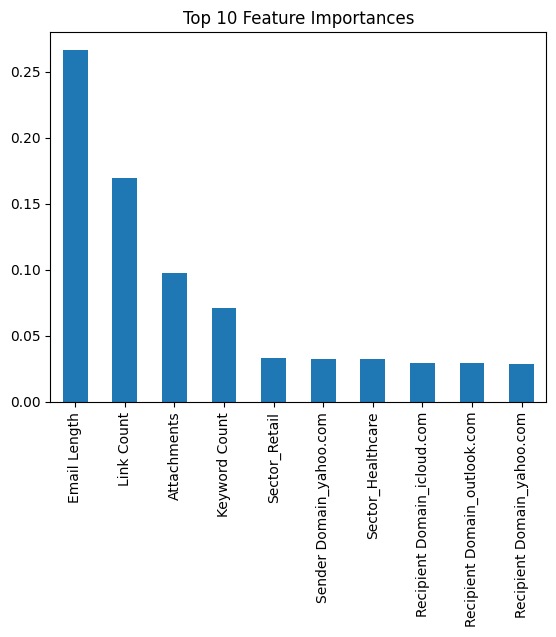

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from the trained model
feature_importance = pd.Series(model.feature_importances_, index=X_train_clean.columns)

# Plot the top 10 most important features
feature_importance.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.show()


In [46]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'random_forest_model.pkl')

# Later, you can load the model for inference
loaded_model = joblib.load('random_forest_model.pkl')


In [61]:
import pandas as pd

# Assuming 'Timestamp' is the column with the timestamp of the emails
df = pd.read_csv('/content/gdrive/MyDrive/DA/DA Assignment/Phishing_Email_Dataset_Ucl.csv')

monthly_trends = df.groupby('Year_Month').size()  # Count emails per month
print
print(monthly_trends)

# Plotting the trend
monthly_trends.plot(kind='line')
plt.title('Phishing Emails Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Emails')
plt.show()



KeyError: 'Year_Month'

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Timestamp' is the column with the timestamp of the emails
df = pd.read_csv('/content/gdrive/MyDrive/DA/DA Assignment/Phishing_Email_Dataset_Ucl.csv')

# Check the actual column names in the DataFrame


In [63]:
import pandas as pd

# Assuming 'Timestamp' is the column with the timestamp of the emails
df = pd.read_csv('/content/gdrive/MyDrive/DA/DA Assignment/Phishing_Email_Dataset_Ucl.csv')

monthly_trends = df.groupby('Year_Month').size()  # Count emails per month
print
print(monthly_trends)

# Plotting the trend
monthly_trends.plot(kind='line')
plt.title('Phishing Emails Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Emails')
plt.show()



KeyError: 'Year_Month'

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Timestamp' is the column with the timestamp of the emails
df = pd.read_csv('/content/gdrive/MyDrive/DA/DA Assignment/Phishing_Email_Dataset_Ucl.csv')

# Print the actual column names to identify the correct column for grouping
print(df.columns)

# Modify the groupby statement to use the correct column name
# For example, if the correct column is 'Date', replace 'Year_Month' with 'Date':
monthly_trends = df.groupby('Date').size()  # Count emails per month
#You can replace 'Date' with the corresponding name of the column containing the email timestamp ( or Year and month data) from the output above.

print(monthly_trends)

# Plotting the trend
monthly_trends.plot(kind='line')
plt.title('Phishing Emails Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Emails')
plt.show()

Index(['Email ID', 'Timestamp', 'Sender Email', 'Recipient Email', 'Subject',
       'Email Body', 'Label', 'IP Address', 'Location', 'Sender Domain',
       'Recipient Domain', 'Email Length', 'Attachments', 'Link Count',
       'Suspicious Keywords', 'Sector'],
      dtype='object')


KeyError: 'Date'

Index(['Email ID', 'Timestamp', 'Sender Email', 'Recipient Email', 'Subject',
       'Email Body', 'Label', 'IP Address', 'Location', 'Sender Domain',
       'Recipient Domain', 'Email Length', 'Attachments', 'Link Count',
       'Suspicious Keywords', 'Sector'],
      dtype='object')
Timestamp
00:02.0    1
00:03.6    1
00:05.8    1
00:05.9    1
00:06.5    1
          ..
59:41.9    1
59:45.8    1
59:46.9    1
59:59.2    1
Error      4
Length: 487, dtype: int64


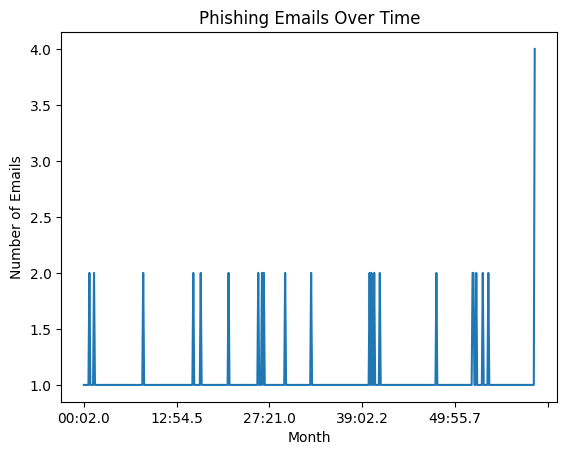

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Timestamp' is the column with the timestamp of the emails
df = pd.read_csv('/content/gdrive/MyDrive/DA/DA Assignment/Phishing_Email_Dataset_Ucl.csv')

# Print the actual column names to identify the correct column for grouping
print(df.columns)

monthly_trends = df.groupby('Timestamp').size()
print(monthly_trends)

# Plotting the trend
monthly_trends.plot(kind='line')
plt.title('Phishing Emails Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Emails')
plt.show()

In [67]:
# Sender Domain Distribution
sender_domain_distribution = df['Sender Domain'].value_counts()
print(sender_domain_distribution)

# Recipient Domain Distribution
recipient_domain_distribution = df['Recipient Domain'].value_counts()
print(recipient_domain_distribution)


Sender Domain
yahoo.com         101
icloud.com         84
aol.com            82
protonmail.com     79
gmail.com          78
outlook.com        70
Error               6
Name: count, dtype: int64
Recipient Domain
gmail.com         93
aol.com           83
yahoo.com         81
icloud.com        80
outlook.com       79
protonmail.com    77
Error              7
Name: count, dtype: int64


In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Timestamp' is the column with the timestamp of the emails
df = pd.read_csv('/content/gdrive/MyDrive/DA/DA Assignment/Phishing_Email_Dataset_Ucl.csv')

# Suspicious Keywords Frequency
suspicious_keywords_distribution = df['Suspicious Keywords'].value_counts()
print(suspicious_keywords_distribution)

# Link Count Analysis
# Convert 'Link Count' column to numeric, handling errors
df['Link Count'] = pd.to_numeric(df['Link Count'], errors='coerce')  # 'coerce' will replace non-numeric values with NaN

link_count_distribution = df['Link Count'].describe()  # Get basic statistics
print(link_count_distribution)

# Detecting anomalies based on Link Count (e.g., unusually high link count)
high_link_count = df[df['Link Count'] > 10]  # Threshold based on your data
print(high_link_count)

Suspicious Keywords
account                     23
update                      20
confirm                     18
password                    18
login                       18
                            ..
urgent, click, confirm       1
update, login                1
account, update, login       1
password, login, confirm     1
password, urgent, login      1
Name: count, Length: 227, dtype: int64
count    503.000000
mean       4.735586
std        2.880015
min        0.000000
25%        2.000000
50%        5.000000
75%        7.000000
max        9.000000
Name: Link Count, dtype: float64
Empty DataFrame
Columns: [Email ID, Timestamp, Sender Email, Recipient Email, Subject, Email Body, Label, IP Address, Location, Sender Domain, Recipient Domain, Email Length, Attachments, Link Count, Suspicious Keywords, Sector]
Index: []


In [71]:
from scipy import stats

# Detecting outliers using z-score (for Link Count)
z_scores = stats.zscore(df['Link Count'])
anomalies = df[z_scores > 3]  # Z-score threshold for outliers
print(anomalies)


Empty DataFrame
Columns: [Email ID, Timestamp, Sender Email, Recipient Email, Subject, Email Body, Label, IP Address, Location, Sender Domain, Recipient Domain, Email Length, Attachments, Link Count, Suspicious Keywords, Sector]
Index: []


Sector
Retail        254
Healthcare    235
Error          10
Name: count, dtype: int64


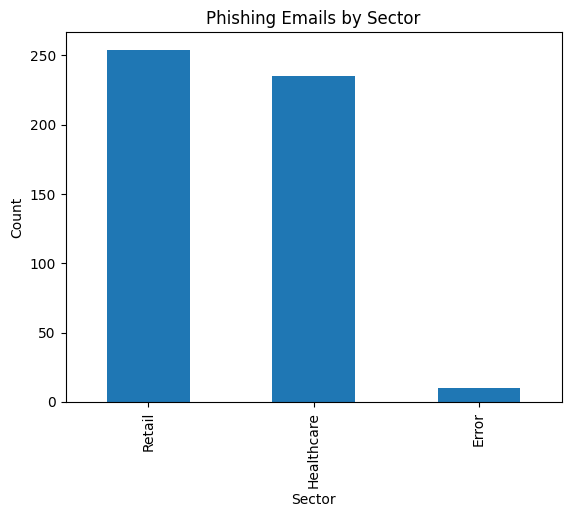

In [72]:
sector_distribution = df['Sector'].value_counts()
print(sector_distribution)

sector_distribution.plot(kind='bar', title="Phishing Emails by Sector")
plt.xlabel("Sector")
plt.ylabel("Count")
plt.show()


In [73]:
# Check for duplicate records
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows
df_clean = df.drop_duplicates()
print(f"Dataset after removing duplicates: {df_clean.shape}")


Number of duplicate rows: 20
Dataset after removing duplicates: (500, 16)


In [75]:
# Convert 'Email Length' and 'Link Count' to numeric, coercing any errors to NaN
df_clean['Email Length'] = pd.to_numeric(df_clean['Email Length'], errors='coerce')
df_clean['Link Count'] = pd.to_numeric(df_clean['Link Count'], errors='coerce')

# Now check for invalid data (negative values)
invalid_data_check = df_clean[(df_clean['Email Length'] < 0) | (df_clean['Link Count'] < 0)]
print(f"Rows with invalid data (negative values): {invalid_data_check.shape[0]}")


Rows with invalid data (negative values): 0


In [76]:
# Drop rows where 'Email Length' or 'Link Count' are NaN
df_clean = df_clean.dropna(subset=['Email Length', 'Link Count'])

# Alternatively, you can impute missing values (e.g., using mean or median)
df_clean['Email Length'].fillna(df_clean['Email Length'].mean(), inplace=True)
df_clean['Link Count'].fillna(df_clean['Link Count'].mean(), inplace=True)


In [77]:
# Check again for negative values (invalid data)
invalid_data_check = df_clean[(df_clean['Email Length'] < 0) | (df_clean['Link Count'] < 0)]
print(f"Rows with invalid data (negative values): {invalid_data_check.shape[0]}")

# Ensure there are no missing values after conversion
missing_data_after = df_clean.isnull().sum()
print("Missing data after final cleaning:")
print(missing_data_after)


Rows with invalid data (negative values): 0
Missing data after final cleaning:
Email ID               21
Timestamp               8
Sender Email           19
Recipient Email        19
Subject                20
Email Body             13
Label                  13
IP Address              7
Location               25
Sender Domain          19
Recipient Domain       18
Email Length            0
Attachments            16
Link Count              0
Suspicious Keywords     0
Sector                 19
dtype: int64


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Assuming the target column is 'Label' (0 = non-phishing, 1 = phishing)

# Select features (X) and target variable (y)
X = df_clean.drop(columns=['Label'])  # Remove target column and any irrelevant columns
y = df_clean['Label']  # Target variable (phishing or not)

# Normalize the features (scaling numeric values)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Logistic Regression model
model = LogisticRegression()


ValueError: could not convert string to float: 'bd510c2e-e9ea-432c-a171-6a83b79e65d7'

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Assuming the target column is 'Label' (0 = non-phishing, 1 = phishing)

# Select features (X) and target variable (y)
# Exclude non-numeric columns like 'Email ID' and 'Timestamp'
X = df_clean.select_dtypes(include=['number']).drop(columns=['Label'])  # Remove target column and select only numeric features
y = df_clean['Label']  # Target variable (phishing or not)

# Normalize the features (scaling numeric values)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Logistic Regression model
model = LogisticRegression()

KeyError: "['Label'] not found in axis"

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Assuming the target column is 'Label' (0 = non-phishing, 1 = phishing)

# Select features (X) and target variable (y)
# Exclude non-numeric columns like 'Email ID' and 'Timestamp'
# 1. Select all columns first, then drop 'Label'
X = df_clean.drop(columns=['Label'])  # Remove target column first
# 2. Then, select only numeric features from X
X = X.select_dtypes(include=['number']) # Select only numeric features

y = df_clean['Label']  # Target variable (phishing or not)

# Normalize the features (scaling numeric values)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Logistic Regression model
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers for Logistic Regression
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Retrain the model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate the optimized model
y_pred_optimized = best_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {optimized_accuracy:.4f}")


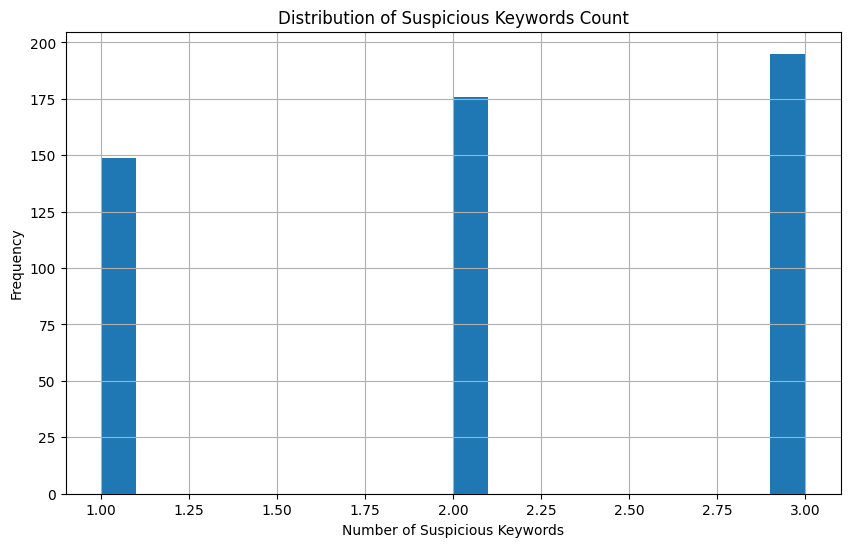

                               Email ID Recommended Action
0  bd510c2e-e9ea-432c-a171-6a83b79e65d7               Safe
1  73dfe436-8485-49f0-9635-8538046c6295               Safe
2  2aad94e0-da9b-437c-be61-49667db5d762               Safe
3  b4fca1ca-22af-4f15-bfee-e7d7adf159e3               Safe
4  4a3461a1-6535-42ce-991d-13adf28b8e52               Safe


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Load your dataset
data = pd.read_csv('/content/gdrive/MyDrive/DA/DA Assignment/Phishing_Email_Dataset_Ucl.csv')

# Clean data (if necessary)
data['Email Body'] = data['Email Body'].fillna('')  # Fill missing values in Email Body


data['Email Length'] = data['Email Body'].apply(len)


data['Suspicious Keywords Count'] = data['Suspicious Keywords'].apply(lambda x: len(str(x).split(',')))

def recommend_action(row):
    if row['Suspicious Keywords Count'] > 5 or row['Email Length'] > 1000:
        return "Flag as Potential Phishing"
    else:
        return "Safe"

data['Recommended Action'] = data.apply(recommend_action, axis=1)

# Now, let's visualize the results

# Plot the distribution of 'Suspicious Keywords Count'
plt.figure(figsize=(10, 6))
data['Suspicious Keywords Count'].hist(bins=20)
plt.title('Distribution of Suspicious Keywords Count')
plt.xlabel('Number of Suspicious Keywords')
plt.ylabel('Frequency')
plt.show()

# Check the recommendation results
print(data[['Email ID', 'Recommended Action']].head())


In [103]:
# Check a few entries from the 'Timestamp' column to identify any issues
print(data['Timestamp'].head(10))


0    32:22.4
1    36:26.4
2    06:52.9
3    27:21.0
4    34:03.8
5    39:57.6
6    56:21.2
7    58:41.8
8    39:09.7
9    06:08.4
Name: Timestamp, dtype: object


In [104]:
# Convert 'Timestamp' with error handling
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

# Check the data again for invalid entries (NaT)
print(data[data['Timestamp'].isna()])


                                 Email ID Timestamp           Sender Email  \
0    bd510c2e-e9ea-432c-a171-6a83b79e65d7       NaT  otyler@protonmail.com   
1    73dfe436-8485-49f0-9635-8538046c6295       NaT   nicole77@outlook.com   
3    b4fca1ca-22af-4f15-bfee-e7d7adf159e3       NaT   mathissean@yahoo.com   
4    4a3461a1-6535-42ce-991d-13adf28b8e52       NaT   morrishannah@aol.com   
5    f4373fcd-1693-42c8-9825-7e64eafb821a       NaT  julieweaver@yahoo.com   
..                                    ...       ...                    ...   
515  b0496a00-6e27-4be8-8392-c465563ed515       NaT       vramos@yahoo.com   
516  809006be-3f95-48ee-81a9-2aa2275a7aa3       NaT       john14@gmail.com   
517  a80a4348-12a1-43b1-863d-c0dae4ff8930       NaT  nancymiller@yahoo.com   
518  1d9f5a3b-9cac-4932-b3ab-3e963a1998cb       NaT      fjones@icloud.com   
519  5c76c0e3-0deb-4d2e-b07f-e8c6c398cde9       NaT   matthew36@icloud.com   

                    Recipient Email  \
0          sarahkemp@pro

In [105]:
# Drop rows with invalid timestamps
data = data.dropna(subset=['Timestamp'])


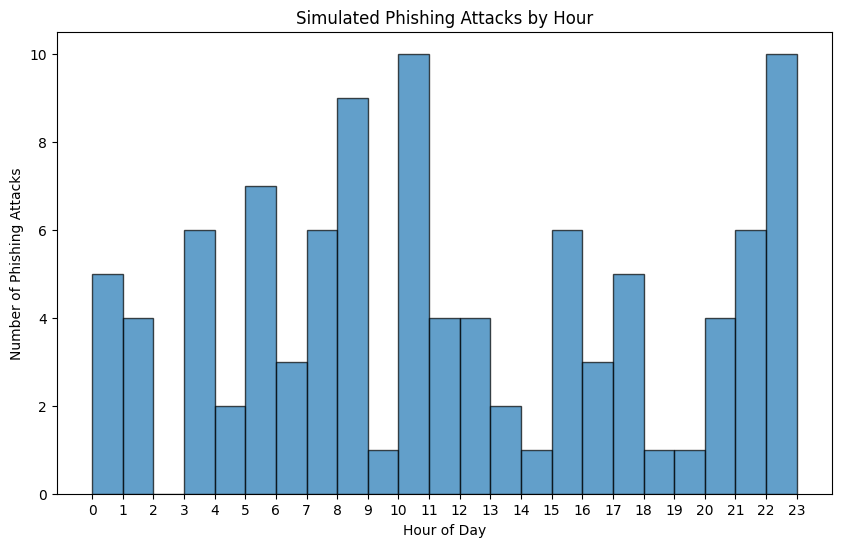

In [106]:
# Now proceed with your analysis
data['hour'] = data['Timestamp'].dt.hour
hourly_counts = data['hour'].value_counts(normalize=True).sort_index()

# Simulate phishing attacks based on the hourly distribution
phishing_times = np.random.choice(hourly_counts.index, size=100, p=hourly_counts.values)

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(phishing_times, bins=np.arange(24), edgecolor='black', alpha=0.7)
plt.title('Simulated Phishing Attacks by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Phishing Attacks')
plt.xticks(np.arange(0, 24))
plt.show()
